# Import Libraries

In [322]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

# Load Data

In [ ]:
data=pd.read_csv('UCI_Credit_Card.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


No null values and no missing data 


In [ ]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No duplicates exist



In [ ]:
data.duplicated().sum()

0

Visualizing all features

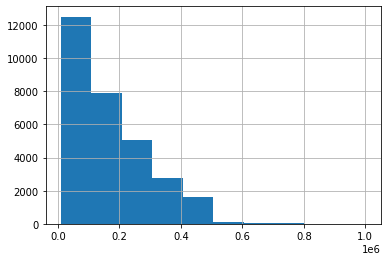

In [ ]:
data.LIMIT_BAL.hist()

([<matplotlib.axis.XTick at 0x7feebe63e510>,
 [Text(0, 0, 'Unknown'),
  Text(0, 0, 'Married'),
  Text(0, 0, 'Single'),
  Text(0, 0, 'Other')])

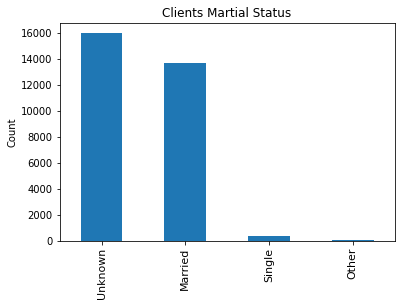

In [ ]:
data.MARRIAGE.value_counts().plot(kind = 'bar', ylabel = 'Count', title = 'Clients Martial Status')
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Other'], fontsize = 11)

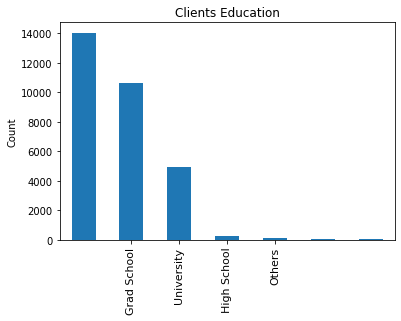

In [ ]:
data.EDUCATION.value_counts().plot(kind = "bar", ylabel = 'Count', title = 'Clients Education')
plt.xticks([1,2,3,4],['Grad School','University','High School','Others'], fontsize = 11);

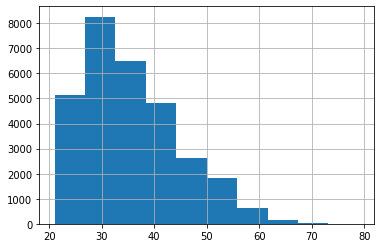

In [ ]:
data.AGE.hist();

Most of the data set is aged between 20 to 40


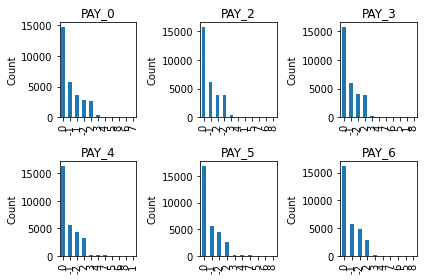

In [ ]:
variables = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig = plt.figure()
for i, var_name in enumerate(variables):
        ax=fig.add_subplot(2,3,i+1)
        data[var_name].value_counts().plot(kind = "bar", ylabel = 'Count', title = var_name)
        ax.set_title(var_name)
fig.tight_layout()
plt.show();


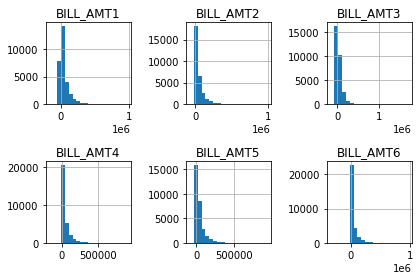

In [ ]:
fig = plt.figure()
variables = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i, var_name in enumerate(variables):
        ax=fig.add_subplot(2,3,i+1)
        data[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
fig.tight_layout()
plt.show()

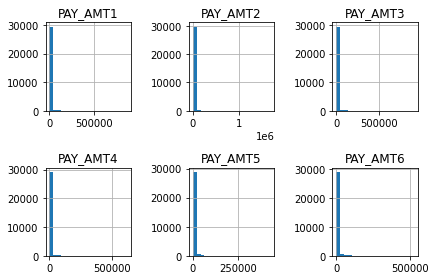

In [ ]:
fig = plt.figure()
variables = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i, var_name in enumerate(variables):
        ax=fig.add_subplot(2,3,i+1)
        data[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name)
fig.tight_layout()
plt.show()

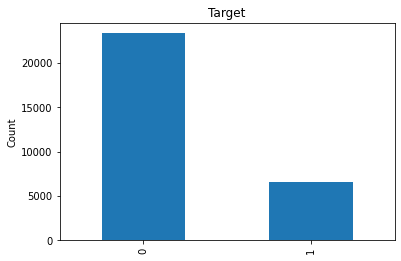

In [ ]:
data['default.payment.next.month'].value_counts().plot(kind = 'bar', ylabel = 'Count', title = 'Target');

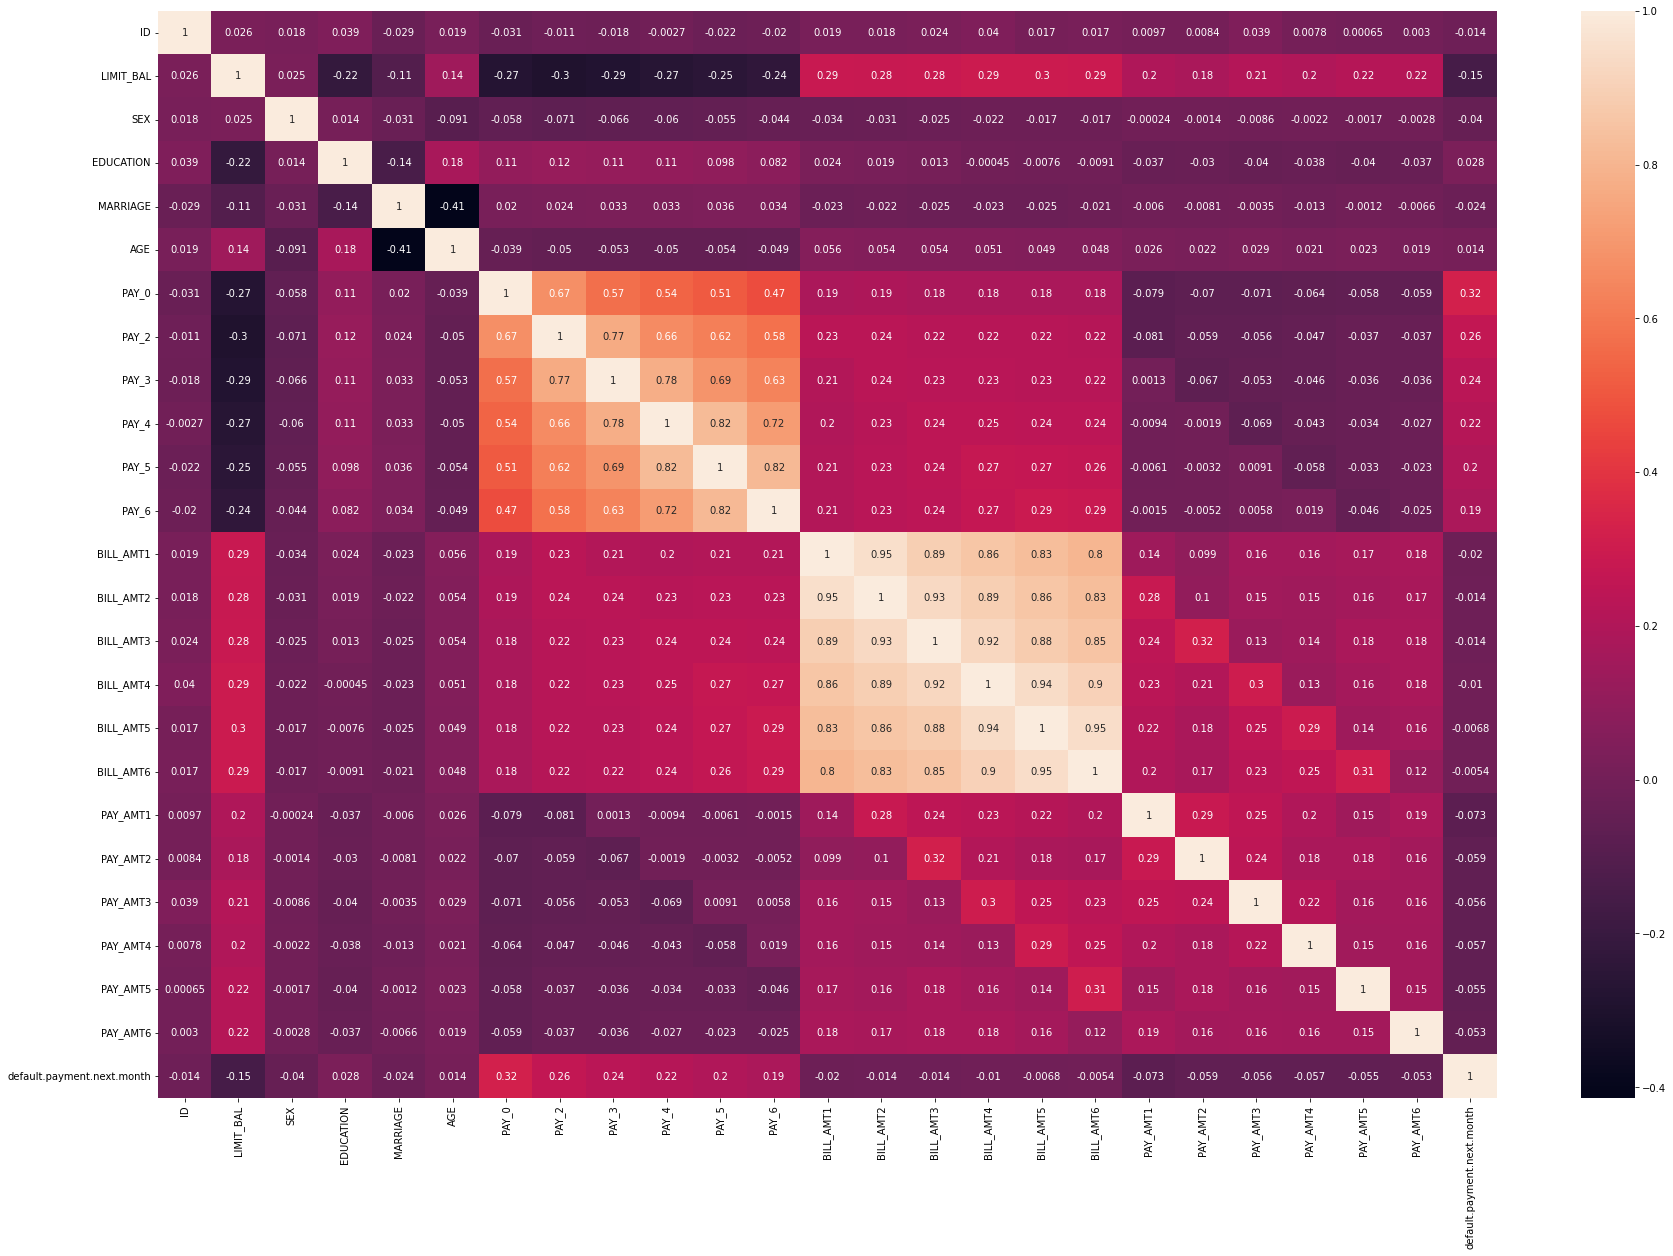

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


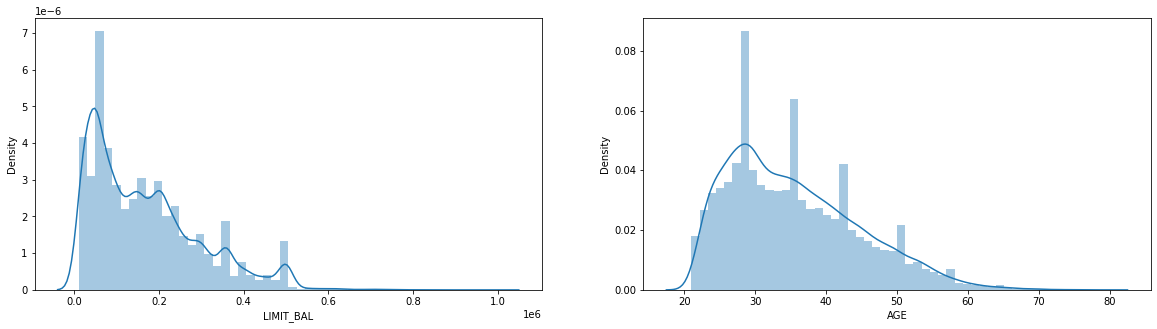

In [ ]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(data.LIMIT_BAL)

plt.subplot(122)
sns.distplot(data.AGE)

plt.show()

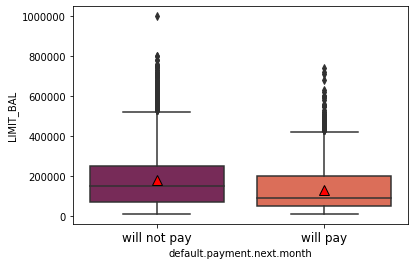

In [ ]:
sns.boxplot(x = "default.payment.next.month", y = "LIMIT_BAL",data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')    
plt.xticks([0,1],['will not pay', 'will pay'], fontsize = 12)

plt.show()

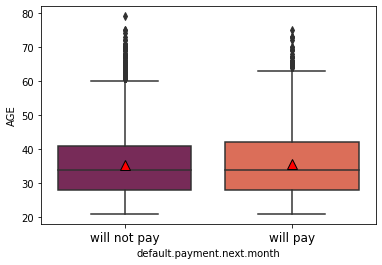

In [ ]:
sns.boxplot(x = "default.payment.next.month", y = "AGE",data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['will not pay', 'will pay'], fontsize = 12)

plt.show()

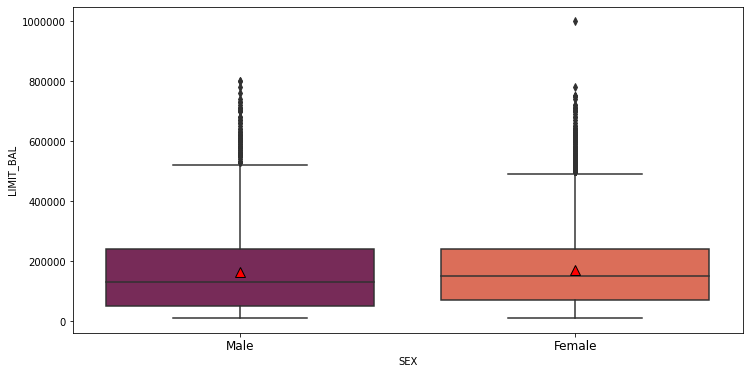

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "SEX", y = "LIMIT_BAL",data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

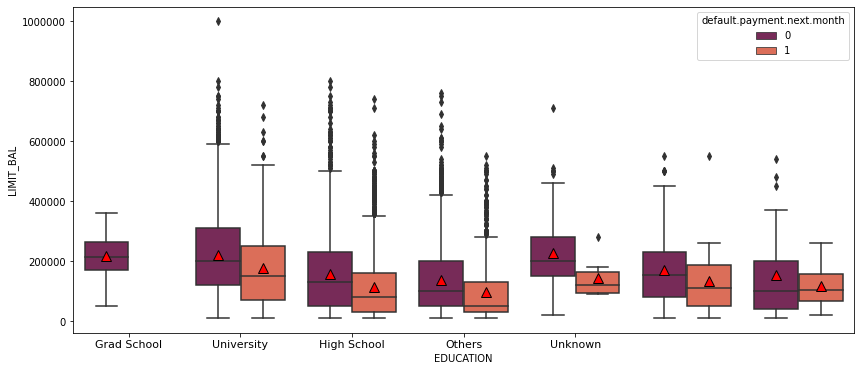

In [ ]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'default.payment.next.month', data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

plt.show()

# Data Cleaning and Feature Engineering

*   ID to be dropped from the dataset as it is not important in learning
*   Renaming PAY_0 to PAY_1 to be as other features and default.payment.next.month to target
*   Changing all categorical features to category
*   0 in MARRIAGE to be referred as unknowns to be handled
*   0, 5, 6 in MARRIAGE to be referred as unknowns to be handled and all to have one value (0)



In [ ]:
clean_data = data.copy()
clean_data = clean_data.drop(['ID'],axis=1)
clean_data = clean_data.rename(columns={'default.payment.next.month': 'target', 
                        'PAY_0': 'PAY_1'})
clean_data.SEX = clean_data.SEX.astype("category")
clean_data.EDUCATION = clean_data.EDUCATION.astype("category")
clean_data.MARRIAGE = clean_data.MARRIAGE.astype("category")
clean_data.PAY_1 = clean_data.PAY_1.astype("category")
clean_data.PAY_2 = clean_data.PAY_2.astype("category")
clean_data.PAY_3 = clean_data.PAY_3.astype("category")
clean_data.PAY_4 = clean_data.PAY_4.astype("category")
clean_data.PAY_5 = clean_data.PAY_5.astype("category")
clean_data.PAY_6 = clean_data.PAY_6.astype("category")
clean_data.target = clean_data.target.astype("category")
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  float64 
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_1      30000 non-null  category
 6   PAY_2      30000 non-null  category
 7   PAY_3      30000 non-null  category
 8   PAY_4      30000 non-null  category
 9   PAY_5      30000 non-null  category
 10  PAY_6      30000 non-null  category
 11  BILL_AMT1  30000 non-null  float64 
 12  BILL_AMT2  30000 non-null  float64 
 13  BILL_AMT3  30000 non-null  float64 
 14  BILL_AMT4  30000 non-null  float64 
 15  BILL_AMT5  30000 non-null  float64 
 16  BILL_AMT6  30000 non-null  float64 
 17  PAY_AMT1   30000 non-null  float64 
 18  PAY_AMT2   30000 non-null  float64 
 19  PAY_AMT3   30000 non-null

([<matplotlib.axis.XTick at 0x7feebb3769d0>,
 [Text(0, 0, 'Unknown'),
  Text(0, 0, 'Grad School'),
  Text(0, 0, 'University'),
  Text(0, 0, 'High School'),
  Text(0, 0, 'Others')])

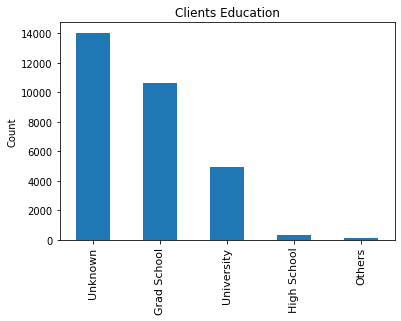

In [ ]:
clean_data.loc[:,'EDUCATION'] = clean_data.loc[:,'EDUCATION'].replace(5,0)
clean_data.loc[:,'EDUCATION'] = clean_data.loc[:,'EDUCATION'].replace(6,0)
clean_data.EDUCATION.value_counts().plot(kind = "bar", ylabel = 'Count', title = 'Clients Education')
plt.xticks([0,1,2,3,4],['Unknown','Grad School','University','High School','Others'], fontsize = 11)



1.   -2 and 0 in PAY_1 to PAY_6 do have meanings in the banking industry. After research we have found that: - 
    - 0 means that the customer paid enough for their account to remain in good standing, but did revolve a balance as he/she did not pay the whole amount.
    - -2 means that the credit card is inactive.
2.   Unknown values can be treated as specific data. Unknown martial status can be divorce and unknown education can be below high school education.



# Model Selection

# Logistic Regression

First trying on the whole clean dataset

In [ ]:
df_X = clean_data.drop(['target'], axis=1)
df_y = clean_data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5995
           1       0.00      0.40      0.00         5

    accuracy                           0.78      6000
   macro avg       0.50      0.59      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4680 1315]
 [   3    2]]

Accuracy Score for model1:  0.7803333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Trying to discard unknown values

In [ ]:
test = clean_data[clean_data['MARRIAGE'] != 0]
test = test[test["EDUCATION"] != 0]
df_X = test.drop(['target'], axis=1)
df_y = test.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      5920
           1       0.00      0.00      0.00         1

    accuracy                           0.77      5921
   macro avg       0.50      0.39      0.44      5921
weighted avg       1.00      0.77      0.87      5921

[[4578 1342]
 [   1    0]]

Accuracy Score for model2:  0.773180206046276


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  float64 
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_1      30000 non-null  category
 6   PAY_2      30000 non-null  category
 7   PAY_3      30000 non-null  category
 8   PAY_4      30000 non-null  category
 9   PAY_5      30000 non-null  category
 10  PAY_6      30000 non-null  category
 11  BILL_AMT1  30000 non-null  float64 
 12  BILL_AMT2  30000 non-null  float64 
 13  BILL_AMT3  30000 non-null  float64 
 14  BILL_AMT4  30000 non-null  float64 
 15  BILL_AMT5  30000 non-null  float64 
 16  BILL_AMT6  30000 non-null  float64 
 17  PAY_AMT1   30000 non-null  float64 
 18  PAY_AMT2   30000 non-null  float64 
 19  PAY_AMT3   30000 non-null

It became worse. Let's try to drop uncorrelated columns

In [ ]:
df_X = clean_data.filter(items=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
df_y = clean_data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model3 = LogisticRegression()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
y_train_pred = model3.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model3: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model3: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5584
           1       0.23      0.72      0.34       416

    accuracy                           0.81      6000
   macro avg       0.60      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000

[[4565 1019]
 [ 118  298]]

Test Accuracy Score for model3:  0.8105

Train Accuracy Score for model3:  0.808375


After dropping all features except the most correlated one

In [ ]:
df_X = clean_data.filter(items=['PAY_1'])
df_y = clean_data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model4 = LogisticRegression()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
y_train_pred = model4.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model4: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model4: ', accuracy_score(y_train_pred,y_train))


              precision    recall  f1-score   support

           0       0.96      0.84      0.89      5386
           1       0.33      0.71      0.45       614

    accuracy                           0.82      6000
   macro avg       0.65      0.77      0.67      6000
weighted avg       0.90      0.82      0.85      6000

[[4504  882]
 [ 179  435]]

Test Accuracy Score for model4:  0.8231666666666667

Train Accuracy Score for model4:  0.8187083333333334


Trying other models on most correlated feautures (having the six correlated features as fitting the model on one feature only may overfit the model)

In [325]:
df_X = clean_data.filter(items=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
df_y = clean_data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)
y_train_pred = model5.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model5: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model5: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5335
           1       0.32      0.63      0.42       665

    accuracy                           0.81      6000
   macro avg       0.63      0.73      0.65      6000
weighted avg       0.88      0.81      0.83      6000

[[4436  899]
 [ 247  418]]

Test Accuracy Score for model5:  0.809

Train Accuracy Score for model5:  0.8140416666666667


In [326]:
df_X = clean_data.filter(items=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
df_y = clean_data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model6 = tree.DecisionTreeClassifier( criterion='entropy', max_depth = 8)
model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)
y_train_pred = model6.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model6: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model6: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5306
           1       0.36      0.68      0.47       694

    accuracy                           0.82      6000
   macro avg       0.66      0.76      0.68      6000
weighted avg       0.88      0.82      0.84      6000

[[4463  843]
 [ 220  474]]

Test Accuracy Score for model6:  0.8228333333333333

Train Accuracy Score for model6:  0.8252083333333333


# Hyperparameters Tunning

After getting that the Decision Tree overperforms other models, then hyperparameters tunning is performed on it.

In [319]:
dt = DecisionTreeClassifier(random_state=42)

In [320]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [323]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nTest Accuracy Score for model7: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model7: ', accuracy_score(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5326
           1       0.36      0.70      0.47       674

    accuracy                           0.83      6000
   macro avg       0.66      0.77      0.68      6000
weighted avg       0.89      0.83      0.85      6000

[[4481  845]
 [ 202  472]]

Test Accuracy Score for model7:  0.8255

Train Accuracy Score for model7:  0.8210416666666667
